# Airbnb in the Big Apple

## Introduction
Airbnb, a well-known short-term rental platform utilized worldwide, is frequently in hot water for disrupting the hotel and residence rental industries. The platform operates in a legal gray area, not quite needing to adhere to landlord laws in most cities and thus facing few legal regulations. Cities like New York City are the most disrupted by the influx of Airbnb listings, with residents seeing their rents raising rapidly and communities being made more instable by the lack of permananent residents. Activists and lawmakers claim that Airbnb poses a great threat to affordable housing, resulting in the push for more regulation on the platform's practices. <br><br>
We decided to focus on Airbnb in New York City. New York City is infamous for its lack of affordable housing and its susceptibility to gentrification. It is illegal to rent out a permanent residence for less than 30 days without the owner present in New York City; this law is poorly enforced and regularly broken by Airbnb hosts. NYC further passed an Anti-Airbnb Advertising Law in 2016, which sought to force Airbnb to take down the many illegal listings on the site. The effects of the law was minimal and disappointing, as many hosts were able to conceal their illegal listings with simple misdirection. <br> We're curious to see what insights we can find within New York City's Airbnb data.

## Data Description

- This data is a collection of over 45,000 observed Airbnb listings for New York City. The attributes include: the listing and its host's id numbers; the date that the host joined Airbnb; the count of each host's listings; the borough in which the listing is located and its latitude/longitude; the property type and room type of the listing; how many guests that the listing may accomodate, including bedroom and bed count; the price of the listing; the minimum number of nights that a guest must stay; the maximum number of nights that a guest may stay; how many days over the last 30, 60, 90, and 365 days that the host has made the listing available for rent; the dates of the first and latest reviews; the total guest review score; guest review scores based on cleanliness, location, and value; and the averaged number of reviews per month. <br>
- The dataset was created by Inside Airbnb, an independent project to add data to the debates surrounding the ethicality and legality of Airbnb and its methods. Inside Airbnb is not affiliated with Airbnb, but sources all of its data from publicly available information from the Airbnb website. The dataset was created to answer fundamental questions about "how Airbnb is really being used in cities around the world." Inside Airbnb seeks to make Airbnb's data more publicly accessible and scrutinizable so that the public's understanding about the company is not solely dependent upon Airbnb's claims. 
- Inside Airbnb is personally funded by Murray Cox, an Australian community activist and technologist who currently acts as the founder and chief data activist for Inside Airbnb. The dataset and collection is also funded by community donations. Murray Cox personally describes Airbnb as an "activist platform... to help cities and communities respond to the threat of Airbnb on residential neighborhoods throughout the world." Inside Airbnb is not endorsed by any of Airbnb's competitors.
- All data that was observed came straight from Airbnb's publicly available data, including current listings, the availability calendar for 365 days in the future, and reviews for each listing. Thus, the data that Airbnb chooses to make publicly available highly influences the data recorded by Inside Airbnb. Inside Airbnb claims all data is verified. Inside Airbnb's data is a snapshot of listings available at a particular time. This means that a listing is recorded based on when Inside Airbnb observes it on the Airbnb site, not as soon as the listing is made. There is likely some lag between the two.
- Inside Airbnb disclaims that they have already done some verification, cleansing, and aggregation on the data that they provide. It uses an occupancy model called the "San Francisco Model," which can be used to calculate and estimate other metrics not provided by the Airbnb site. The methodology of the model is explicitly outlined under Inside Airbnb's disclaimers. Our own preprocessing included deleting attributes that were not relevant to our research questions (like a listing's unique name or description made by the host). We also created a second data frame which only included listings with at least one review. This allowed us to drop nearly 10,000 observations that would not contribute to any analysis about guest reviews.
- All data was collected from Airbnb's publicly available listings. Hosts creating the listings may or may not be unaware of Inside Airbnb's data collection, but all listings are uploaded and specified voluntarily by hosts in accordance with Airbnb's policies. To upload a listing, hosts agree that Airbnb will make the listing data publicly available, which hosts likely believe is to primarily find guests.
- Raw Data Cornell Box Link: https://cornell.box.com/s/q60hl086lws4nro5pf8snqwc7pab7q5w

In [5]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns


from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import poisson, ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## load cleaned data
##airbnb = pd.read_csv("/Users/eliseburdette/Desktop/airbnb.csv")
##airbnbrev = pd.read_csv("/Users/eliseburdette/Desktop/airbnbreviews.csv")
airbnb = pd.read_csv("airbnb.csv")
airbnbrev = pd.read_csv("airbnbreviews.csv")

# Analysis 1- Minimum Nights and Airbnb Price

## Preregistration Statement
We want to see whether there is a linear relationship between minimum number of nights of an Airbnb and the resultant median price. We can do so by creating a linear regression model where the independent variable is minimum night requirement and the dependent variable is the price. We will have to create a new dataframe with columns minimum night requirement and the median price associated with it.

We choose median price because we don't outliers to heavily skew our data.

We think the results of this will be interesting because in our Phase 2 exploration, we found that a lower minimum night requirement appeared to coincide with higher prices. This is curious, especially given the fact that renting out a permanent residence without the owner present for less than 30 days is illegal under New York State Law. If this relationship turns out to be significant, then Airbnb hosts may in fact have notable financial motivation to break this law and rent out their rooms for fewer days at higher prices.

### Starting Off
We will begin by using all the data in our airbnb.csv dataframe, which we have previously cleaned only to remove Airbnb listings (rows) with listed price as $0. This means that for the following analyses, we have left in outliers to see how our 'raw' data behaves. 

### Separating the data by borough
To better see the impact of minimum nights on the median price, we will separate each borough and analyze each separately. We don't want the inconsistencies between boroughs that we saw in our preliminary analysis to affect our regressions. Each borough will then be given a scatterplot of Price vs. Minimum Night Requirement, with the opacity of each listing reduced slightly so that we can see clustering.

In [2]:
airbnb_all = airbnb.copy()
man = airbnb_all[airbnb_all['borough']=='Manhattan']
brook = airbnb_all[airbnb_all['borough']=='Brooklyn']
queen = airbnb_all[airbnb_all['borough']=='Queens']
stat = airbnb_all[airbnb_all['borough']=='Staten Island']
bronx = airbnb_all[airbnb_all['borough']=='Bronx']

### Price vs. Minimum Night Graphs

Text(0.5, 1.0, 'Manhattan')

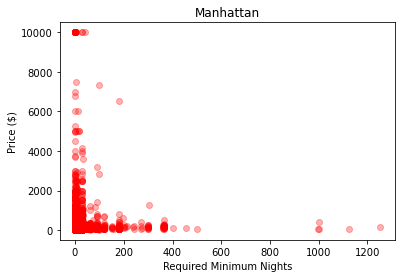

In [3]:
plt.scatter(x=man.minimum_nights,y=man.price,c='red',alpha=0.3)
plt.ylabel("Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Manhattan')

Text(0.5, 1.0, 'Brooklyn')

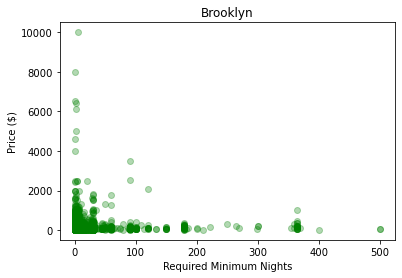

In [4]:
plt.scatter(x=brook.minimum_nights,y=brook.price,c='green',alpha=0.3)
plt.ylabel("Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Brooklyn')

Text(0.5, 1.0, 'Queens')

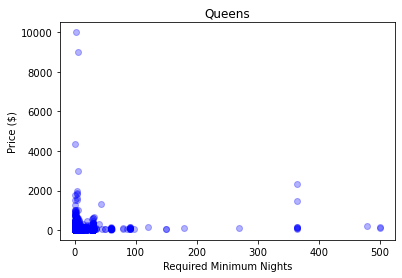

In [5]:
plt.scatter(x=queen.minimum_nights,y=queen.price,c='blue',alpha=0.3)
plt.ylabel("Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Queens')

Text(0.5, 1.0, 'Staten Island')

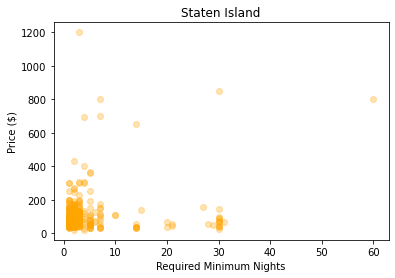

In [6]:
plt.scatter(x=stat.minimum_nights,y=stat.price,c='orange',alpha=0.3)
plt.ylabel("Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Staten Island')

Text(0.5, 1.0, 'Bronx')

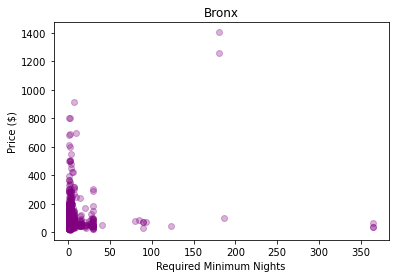

In [7]:
plt.scatter(x=bronx.minimum_nights,y=bronx.price,c='purple',alpha=0.3)
plt.ylabel("Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Bronx')

### Graph Analysis

We can see that for each borough, lower required minimum nights appears to coincide with higher minimum nights. At the very least, with the exception of a couple of outliers, most of the highest prices within each borough have relatively low minimum night requirements. For the most part, it appears that listings with the highest night requirement are priced on the lower end. We can also see that there is a lot of clustering going on, with many listings having the same minimum night requirement. This means we cannot create a linear model with the data as is, since every input (minimum night) into a function may only have one output (corresponding price). This means that in order to proceed, we will have to congeal all listings with equal minimum nights together so that they share one summarizing price. As described in Phase 3, we will choose the median price as our summarizing price, so that the outliers do not skew our results. 

### Grouping each borough by minimum nights
We want to find the median price, which will be done by grouping within each borough by minimum nights. This process will add a new column to our original datasets, titled 'med_price' and giving the median price for each listing based on its minimum night requirement. <br><br>
The following graphs show Median Price vs. Minimum Nights for each borough. Each x-value (minimum night) will only have one corresponding y-value (median price), so we will now be able to attempt a linear model fit.

### Manhattan

Text(0.5, 1.0, 'Manhattan')

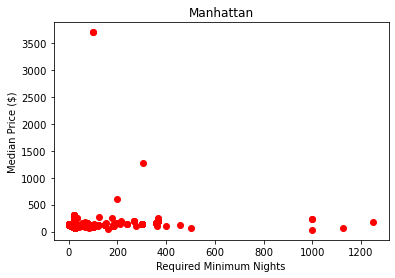

In [8]:
mansub = man[['minimum_nights', 'price']]
mgroup = mansub.groupby(['minimum_nights']).median()
mgroup = mgroup.rename(columns = {'price':'med_price'})
airman = pd.merge(man,mgroup,on="minimum_nights")
plt.scatter(x=airman.minimum_nights, y=airman.med_price, c='red')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Manhattan')

### Brooklyn

Text(0.5, 1.0, 'Brooklyn')

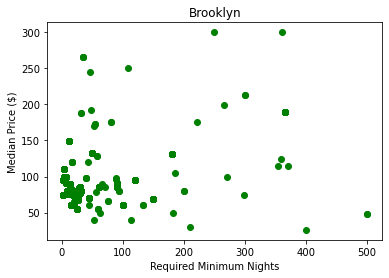

In [9]:
brooksub = brook[['minimum_nights', 'price']]
bgroup = brooksub.groupby(['minimum_nights']).median()
bgroup = bgroup.rename(columns = {'price':'med_price'})
airbrook = pd.merge(brook,bgroup,on="minimum_nights")
plt.scatter(x=airbrook.minimum_nights, y=airbrook.med_price, c='green')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Brooklyn')

### Queens

Text(0.5, 1.0, 'Queens')

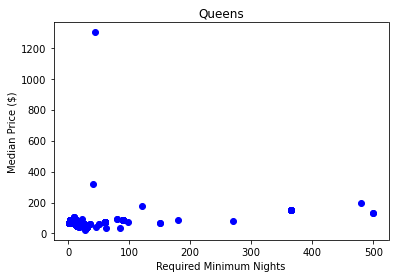

In [10]:
queensub = queen[['minimum_nights', 'price']]
qgroup = queensub.groupby(['minimum_nights']).median()
qgroup = qgroup.rename(columns = {'price':'med_price'})
airqueen = pd.merge(queen,qgroup,on="minimum_nights")
plt.scatter(x=airqueen.minimum_nights, y=airqueen.med_price, c='blue')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Queens')

### Staten Island

Text(0.5, 1.0, 'Staten Island')

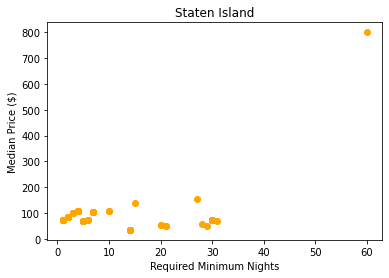

In [11]:
statsub = stat[['minimum_nights', 'price']]
sgroup = statsub.groupby(['minimum_nights']).median()
sgroup = sgroup.rename(columns = {'price':'med_price'})
airstat = pd.merge(stat,sgroup,on="minimum_nights")
plt.scatter(x=airstat.minimum_nights, y=airstat.med_price, c='orange')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Staten Island')

### Bronx

Text(0.5, 1.0, 'Bronx')

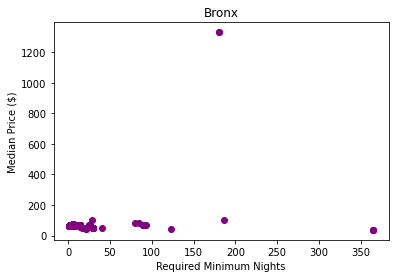

In [12]:
bronxsub = bronx[['minimum_nights', 'price']]
brgroup = bronxsub.groupby(['minimum_nights']).median()
brgroup = brgroup.rename(columns = {'price':'med_price'})
airbronx = pd.merge(bronx,brgroup,on="minimum_nights")
plt.scatter(x=airbronx.minimum_nights, y=airbronx.med_price, c='purple')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Bronx')

### Fitting to Linear Regressions
Based on qualitative analysis of the graphs alone, there is no clear linear relationships or trends for any of the boroughs. We are able to note that nearly each borough displays a clear outlier; this is something we will need to be wary of in our subsequent analyses. <br><br>
We will now make a quantitative analysis by fitting a Linear Regression model to each of the boroughs' data. The resultant regression score will indicate how well the linear model fits the data and thus how confidently we may claim that a linear relationship exists. The regression coefficient will describe the strength of the reaction that median price has to the required minimum nights, as well as the direction of the relation.

### Manhattan

In [13]:
mx=airman[['minimum_nights']]
my=airman['med_price']
mregs=LinearRegression().fit(mx,my)
print(f'Manhattan regression coefficient: {mregs.coef_[0]}')
print(f'Manhattan regression score: {mregs.score(mx,my)}')

Manhattan regression coefficient: 0.11311504009121941
Manhattan regression score: 0.006704618220201741


### Brooklyn

In [14]:
bx=airbrook[['minimum_nights']]
by=airbrook['med_price']
bregs=LinearRegression().fit(bx,by)
print(f'Brooklyn regression coefficient: {bregs.coef_[0]}')
print(f'Brooklyn regression score: {bregs.score(bx,by)}')

Brooklyn regression coefficient: 0.07649205237504408
Brooklyn regression score: 0.013462871821257938


### Queens

In [15]:
qx=airqueen[['minimum_nights']]
qy=airqueen['med_price']
qregs=LinearRegression().fit(qx,qy)
print(f'Queens regression coefficient: {qregs.coef_[0]}')
print(f'Queens regression score: {qregs.score(qx,qy)}')

Queens regression coefficient: -0.02800173438722952
Queens regression score: 0.0006979704297267464


### Staten Island

In [16]:
sx=airstat[['minimum_nights']]
sy=airstat['med_price']
sregs=LinearRegression().fit(sx,sy)
print(f'Staten Island regression coefficient: {sregs.coef_[0]}')
print(f'Staten Island regression score: {sregs.score(sx,sy)}')

Staten Island regression coefficient: 1.9225872762433966
Staten Island regression score: 0.10762705642781467


### Bronx

In [17]:
brx=airbronx[['minimum_nights']]
bry=airbronx['med_price']
brregs=LinearRegression().fit(brx,bry)
print(f'Bronx regression coefficient: {brregs.coef_[0]}')
print(f'Bronx regression score: {brregs.score(brx,bry)}')

Bronx regression coefficient: 0.6909116269723008
Bronx regression score: 0.08551779649078517


## Overall Evaluation of Significance of Initial Linear Regression
Nearly all regression coefficients were shown to have a magnitude less than 1, suggesting fairly weak relationship between minimum nights and median price for those boroughs. As minimum nights increases, the median price reacts at a slow rate. Staten Island's regression coefficient stood at 1.923, meaning that within Staten Island, the median price nearly doubles for each additional required night. We should be wary of this, however, especially given that we can see a clear outlier on Staten Island's graph.<br>
<br><br>The positive regression coefficients suggests that for the corresponding boroughs, higher minimum night requirement actually coincides with higher median price. This was not what we expected given the outcomes of our initial analysis in Phase 2. Queens is the only borough with a negative regression coefficient, implying that lower minimum night requirement (slightly) coincides with higher price.<br><br>

The quantitative analysis shows us that each regression score is significantly far from being a perfect-fit of 1.00. This means that linear models do not fit any of the borough's data very strongly. In other words, each of the boroughs fail to indicate a linear relationship between minimum nights and median price with their 'raw' data.

### Moving Forward
Clearly a Linear Regression analysis on the entirety of our data did not tell us much. However, we can see in each graph that each borough other than Brooklyn has clear outliers in median price. We want to get rid of these outliers as they may be skewing our data; perhaps this will allow us to see some better linear fits.  <br><br>
One reason that we've found for outliers is that several Airbnb listings have a 'random' minimum night requirement that no other listings have. For example, there are a total of 11,117 listings that have 1 night as the minimum requirement. Therefore the median price coinciding with a 1 night requirement is the median between more than 11,000 prices, so we can probably trust this to summarize the prices. Meanwhile, there is a single listing with a minimum night requirement of 265 days, a seemingly random number of days. The median price coinciding with a 265 day requirement is exactly the price of this singular listing. Under this, the single 265-day price has as much of an effect on the linear regression model as the median found between 11,117 prices. <br><br>
To account for this, we want to get rid of the listings that have unique minimum night requirements as they serve as outliers. <br>
To simplify our data further, we will focus only on Airbnb's that are listed for strictly less than a year. Airbnb's with a higher minimum night requirement than that are essentially full-time leases. 

### Manhattan

Text(0.5, 1.0, 'Manhattan')

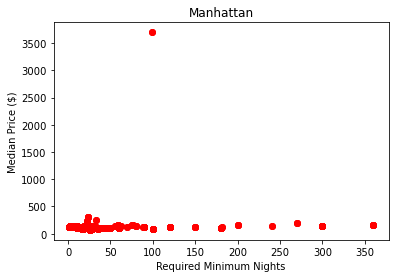

In [19]:
nairmann = airman[airman['minimum_nights']<365]
mcount = nairmann.minimum_nights.value_counts()
nairmann = nairmann[nairmann['minimum_nights'].isin(mcount[mcount > 1].index)]
plt.scatter(x=nairmann.minimum_nights, y=nairmann.med_price, c='red')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Manhattan')

Manhattan still has a notably extreme outlier. Looking into the data, we found that there were two listings both with a 99 night requirement and price of $3699. Given that the cleaned nairman dataframe consists of over 20,000 listings, we feel that it is reasonable to throw out two peculiar listings. 

Text(0.5, 1.0, 'Manhattan w/o Outliers')

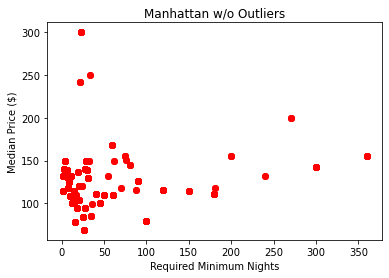

In [20]:
nairman = nairmann[nairmann.med_price != nairmann.med_price.max()]
plt.scatter(x=nairman.minimum_nights, y=nairman.med_price, c='red')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Manhattan w/o Outliers')

### Brooklyn

Text(0.5, 1.0, 'Brooklyn')

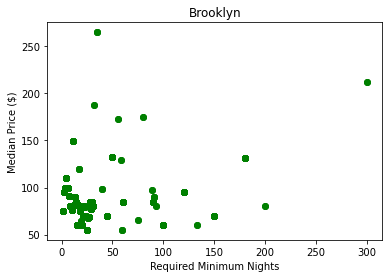

In [21]:
nairbrook = airbrook[airbrook['minimum_nights']<365]
bcount = nairbrook.minimum_nights.value_counts()
nairbrook = nairbrook[nairbrook['minimum_nights'].isin(bcount[bcount > 1].index)]
plt.scatter(x=nairbrook.minimum_nights, y=nairbrook.med_price, c='green')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Brooklyn')

Brooklyn does not have any unreasonable outliers so we will leave it as.

### Queens

Text(0.5, 1.0, 'Queens')

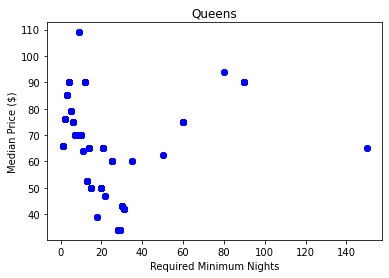

In [22]:
nairqueen = airqueen[airqueen['minimum_nights']<365]
qcount = nairqueen.minimum_nights.value_counts()
nairqueen = nairqueen[nairqueen['minimum_nights'].isin(qcount[qcount > 1].index)]
plt.scatter(x=nairqueen.minimum_nights, y=nairqueen.med_price, c='blue')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Queens')

Queens also does not have any offensive outliers, so we don't feel the need to edit this any further.

### Staten Island

Text(0.5, 1.0, 'Staten Island')

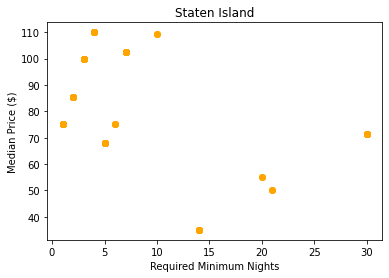

In [23]:
nairstat = airstat[airstat['minimum_nights']<365]
scount = nairstat.minimum_nights.value_counts()
nairstat = nairstat[nairstat['minimum_nights'].isin(scount[scount > 1].index)]
plt.scatter(x=nairstat.minimum_nights, y=nairstat.med_price, c='orange')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Staten Island')

Staten Island has notably fewer points. However there are no notable outliers and no need to remove any more listings.

### Bronx

Text(0.5, 1.0, 'Bronx')

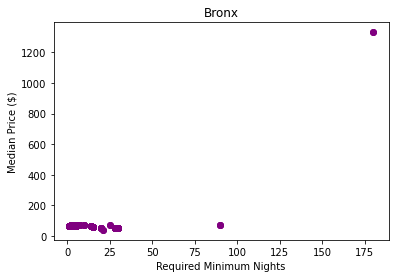

In [24]:
nnairbronx = airbronx[airbronx['minimum_nights']<365]
brcount = nnairbronx.minimum_nights.value_counts()
nnairbronx = nnairbronx[nnairbronx['minimum_nights'].isin(brcount[brcount > 1].index)]
plt.scatter(x=nnairbronx.minimum_nights, y=nnairbronx.med_price, c='purple')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Bronx')

The Bronx also has an extreme outlier. Looking at the data we found that again, there are two listings with the same minimum night requirement priced at $1330.50. Interestingly, both listings are owned by the same person. Inside Airbnb, our source for the data, warned that some lazy Airbnb hosts will simply jack up the price rather than remove a listing if they don't intend to rent it out for a while. Taking this to heart, we will remove this outlier, again not feeling bad about throwing out two listings out of 1173 total in nairbronx.

Text(0.5, 1.0, 'Bronx w/o Outliers')

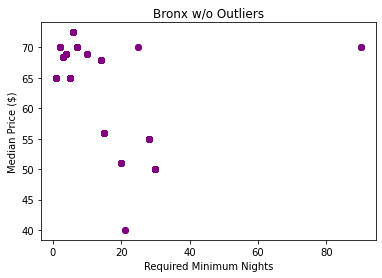

In [25]:
nairbronx = nnairbronx[nnairbronx.med_price != nnairbronx.med_price.max()]
plt.scatter(x=nairbronx.minimum_nights, y=nairbronx.med_price, c='purple')
plt.ylabel("Median Price ($)")
plt.xlabel("Required Minimum Nights")
plt.title('Bronx w/o Outliers')

## New Linear Regression Fits & Evaluation of Significance
Using our newly cleaned dataframes, we will try to refit a linear model to them again. 

### Manhattan

In [26]:
mmx=nairman[['minimum_nights']]
mmy=nairman['med_price']
mmregs=LinearRegression().fit(mmx,mmy)
print(f'New Manhattan regression coefficient: {mmregs.coef_[0]}')
print(f'New Manhattan regression score: {mmregs.score(mmx,mmy)}')

New Manhattan regression coefficient: 0.04978273569000373
New Manhattan regression score: 0.005146827448543889


Our means of reducing outliers in fact reduced our regression score from ~0.006 to ~0.005. This means that the linear regression model was an even poorer fit for our cleaned dataframe than it was for our 'raw' data. The regression coefficient also decreased from ~0.113 to ~0.048. This tells us that for Manhattan's cleaned data, as the minimum night requirement increases, the median price increases at a slower rate than it did for the 'raw' data.

### Brooklyn

In [27]:
bbx=nairbrook[['minimum_nights']]
bby=nairbrook['med_price']
bbregs=LinearRegression().fit(bbx,bby)
print(f'New Brooklyn regression coefficient: {bbregs.coef_[0]}')
print(f'New Brooklyn regression score: {bbregs.score(bbx,bby)}')

New Brooklyn regression coefficient: -0.058612048692961216
New Brooklyn regression score: 0.004172224996163876


The regression score has decreased from ~0.0135 to ~0.0042. This means that our cleaned Brooklyn data was even poorer suited for a linear model than the 'raw' data was. The regression coefficient both decreased in magnitude from ~0.076 to ~0.059 and flipped signs from positive to negative. This means that for Brooklyn's cleaned data, as minimum night requirement increases, the median price now decreases, albeit at a slower rate than it increased with the 'raw' data.

### Queens

In [28]:
qqx=nairqueen[['minimum_nights']]
qqy=nairqueen['med_price']
qqregs=LinearRegression().fit(qqx,qqy)
print(f'New Queens regression coefficient: {qqregs.coef_[0]}')
print(f'New Queens regression score: {qqregs.score(qqx,qqy)}')

New Queens regression coefficient: -0.7609297988957966
New Queens regression score: 0.36024968209931096


The regression score for queens increased significantly from ~0.000698 to ~0.360. However, while a linear model much better suits Queens' cleaned data than it did for the 'raw' data, a regression score of 0.36 still does not indicate a strong linear fit. The regression coefficient remained negative but increased in magnitude from ~0.028 to ~0.761. This means that for Queen's cleaned data, as minimum night requirement increases, the median prices decreases at a faster rate than it did for the 'raw' data.

### Staten Island

In [29]:
ssx=nairstat[['minimum_nights']]
ssy=nairstat['med_price']
ssregs=LinearRegression().fit(ssx,ssy)
print(f'New Staten Island regression coefficient: {ssregs.coef_[0]}')
print(f'New Staten Island regression score: {ssregs.score(ssx,ssy)}')

New Staten Island regression coefficient: -0.6542247159477105
New Staten Island regression score: 0.07731213262377779


The regression score decreased from ~0.108 to ~0.077. Similarly to Manhattan and Brooklyn, this indicates that the cleaned Staten Island data showed even less aptitude for a linear fit than the 'raw' data. The regression coefficient both significantly decreased in magnitude from ~1.923 to ~0.654 and flipped signs from positive to negative. For the Staten Island cleaned data, as minimum nights increases, the median price now decreases, albeit at a significantly slower rate than it increased before. 

### Bronx

In [30]:
bbrx=nairbronx[['minimum_nights']]
bbry=nairbronx['med_price']
bbrregs=LinearRegression().fit(bbrx,bbry)
print(f'New Bronx regression coefficient: {bbrregs.coef_[0]}')
print(f'New Bronx regression score: {bbrregs.score(bbrx,bbry)}')

New Bronx regression coefficient: -0.2930413666497858
New Bronx regression score: 0.24360661101625347


The regression score increased from ~0.0855 to ~0.244. Similarly to Queens though, it is important to note that while the cleaned Bronx data shows better aptitude for a linear model than the 'raw' data, a regression score of 0.244 is still not indicative of a strong fit. The regression coefficient both decreased in magnitude from ~0.691 to ~0.293 and flipped signs from positive to negative. For the Bronx cleaned data, as minimum nights increases, the median price now decreases, albeit at a slower rate.

## Conclusion: Analysis 1
Even after throwing out outliers, each borough proved to be a poor fit for linear modeling; none of our regression scores had signifcant value even close to 1.00. There is no clear indication that there exists a linear relationship, inverse nor direct, between the minimum night requirement of a listing and its associated median price. <br><br>
We had thought that finding indications of an inverse linear relationship between minimum nights and price could tell us about financial motivations of Airbnb hosts. If we'd found indications, then hosts would stand to make more money by reducing their minimum night requirement as much as possible, even if that means breaking New York City law. <br>
However, without indications of any kind of linear relationship, we cannot make any determinations about the minimum night requirement's effect on price. If we were to trust the cleaned data's results, we'd say that the negative regression coefficients indicate inverse behavior for all boroughs other than Manhattan. The magnitude of each coefficient is less than 1, indicating that the behavior is slow. Again though, it would be irresponsible to declare this given how low the regression scores were. <br>
Rather, we can conclude after this analysis that the minimum night requirement alone does not have a significant linear effect on the median price of a listing. Therefore we cannot say whether Airbnb hosts have any clear fiscal motivations in creating their listings' minimum night requirements.

# Analysis 2: Minimum Nights and Listing Availability

## Preregistation Statement
For our second analysis, we want to see whether we can forecast availability for rooms in Brooklyn based off minimum night requirement.

We chose Brooklyn simply to zero in one borough, and because it has the most number of reviews and thus intuitively, the most number of stays.

We will do this by training the model and then testing the model. Similarly for Analysis 1, we will have to create a new dataframe using median nights available.

Similarly as above, we can see how minimum nights may affect availability of a listing and whether minimum nights can be used to forecast availability. Again, this will be interesting to see if Airbnb's with high minimum night requirement can be forecasted to have high availability, as this indicates that these listings are not rented out (and therefore perhaps in low demand). This may reveal to us the actual demand of legal Airbnb listings; if it is low, then hosts again have motivation to break New York law and reduce their minimum night requirement.

## Data Analysis

We want to find the median nights available, which can be done by grouping within Brooklyn by minimum nights. This process will add a new column to our original datasets, titled 'med_avail_l30d' and giving the median nights available for the next 30 days for each listing based on its minimum night requirement.

In [2]:
airbnb_all = airbnb.copy()
brooklyn = airbnb_all[airbnb_all['borough']=='Brooklyn']
brooksub = brooklyn[['minimum_nights', 'avail_l30d']]
bgroup = brooksub.groupby(['minimum_nights']).median()
bgroup = bgroup.rename(columns = {'avail_l30d':'med_avail_l30d'})
abnb_brooklyn = pd.merge(brooklyn,bgroup,on="minimum_nights")

### Scatterplot with a linear regression line

The following scatterplot shows Median Nights Available for 30 days vs. Minimum Nights for Brooklyn with a linear regression line. Each x-value (minimum night) will only have one corresponding y-value (median nights available). From this scatterplot, we can tell that there is a strong correlation between how minimum nights affects availability of a listing.

<AxesSubplot:xlabel='minimum_nights', ylabel='med_avail_l30d'>

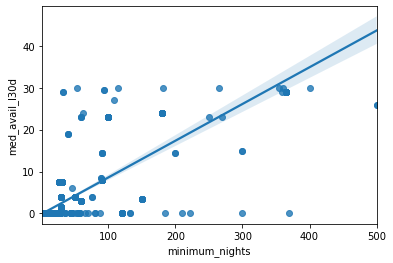

In [6]:
sns.regplot(x=abnb_brooklyn.minimum_nights, y=abnb_brooklyn.med_avail_l30d, data=abnb_brooklyn)

In [14]:
abnb_brooklyn['med_avail_l30d'] = abnb_brooklyn['med_avail_l30d'].astype(int)
brooklyn_train, brooklyn_test = train_test_split(abnb_brooklyn, test_size=0.3, random_state = 15)

## Testing and training the model

### Train split table

In [13]:
brooklyn_train.head()

,Unnamed: 0,id,host_id,host_since,host_listings_count,borough,latitude,longitude,property_type,room_type,...,nreviews,nreviews_l30d,first_review,last_review,total_review,clean_review,location_review,value_review,reviews_per_month,med_avail_l30d
10658,2350,1654713,5556571,2013-03-21,3.0,Brooklyn,40.70617,-73.93761,Private room in loft,Private room,...,45,0,2013-09-17,2020-03-03,9.0,7.0,10.0,9.0,0.53,0
8185,20740,20726517,21531418,2014-09-19,2.0,Brooklyn,40.70929,-73.95381,Entire apartment,Entire home/apt,...,9,0,2017-11-03,2019-02-17,9.3,9.0,10.0,10.0,0.26,0
10362,43656,43667745,57186170,2016-02-02,3.0,Brooklyn,40.68248,-73.94580,Entire apartment,Entire home/apt,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
17266,39187,40528582,320114,2010-12-16,0.0,Brooklyn,40.70411,-73.94198,Entire apartment,Entire home/apt,...,2,0,2020-01-06,2020-03-08,9.0,8.0,10.0,9.0,0.24,0
4403,17995,18054268,271799,2010-10-26,2.0,Brooklyn,40.69424,-73.93850,Entire apartment,Entire home/apt,...,130,0,2017-04-19,2020-02-21,9.6,9.0,9.0,9.0,3.15,0


### Test split table

In [15]:
brooklyn_test.head()

,Unnamed: 0,id,host_id,host_since,host_listings_count,borough,latitude,longitude,property_type,room_type,...,nreviews,nreviews_l30d,first_review,last_review,total_review,clean_review,location_review,value_review,reviews_per_month,med_avail_l30d
1743,19305,19385872,110175454,2017-01-06,1.0,Brooklyn,40.66658,-73.95167,Entire apartment,Entire home/apt,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9210,29983,30853694,14276413,2014-04-14,1.0,Brooklyn,40.69066,-73.95922,Entire loft,Entire home/apt,...,2,0,2018-12-23,2019-01-01,8.0,9.0,9.0,9.0,0.10,0
9944,37762,39487415,117645326,2017-02-22,0.0,Brooklyn,40.66316,-73.95629,Private room in townhouse,Private room,...,26,0,2019-10-30,2020-03-12,10.0,10.0,10.0,10.0,2.47,0
2540,29676,30524542,18403410,2014-07-19,1.0,Brooklyn,40.67817,-73.94691,Private room in apartment,Private room,...,3,0,2018-12-10,2019-03-23,10.0,9.0,9.0,9.0,0.14,0
14446,37746,39481793,14691130,2014-04-24,0.0,Brooklyn,40.68435,-73.95884,Entire condominium,Entire home/apt,...,1,0,2019-12-18,2019-12-18,10.0,10.0,10.0,10.0,0.11,4


### Fitting Logistic Regression Model 
Then we fit a logistic regression model with median available nights as the outcome and body mass as the minimum_nights.

In [16]:
model = LogisticRegression(solver="lbfgs").fit(brooklyn_train[["minimum_nights"]], brooklyn_train["med_avail_l30d"])

/Users/tonybridges/opt/anaconda3/envs/info2950/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predictions on test/ traning set

In [17]:
correct = sum(brooklyn_test["med_avail_l30d"] == model.predict(brooklyn_test[['minimum_nights']]))
total = len(brooklyn_test)
print(('Prediction on the test set = {:.3f}').format(correct / total))

Prediction on the test set = 0.970


In [18]:
correct = sum(brooklyn_train["med_avail_l30d"] == model.predict(brooklyn_train[['minimum_nights']]))
total = len(brooklyn_train)
print(('Prediction on the training set = {:.3f}').format(correct / total))

Prediction on the training set = 0.972


In [19]:
print(f'Brooklyn regression score: {model.score(brooklyn_train[["minimum_nights"]],brooklyn_train["med_avail_l30d"])}')

Brooklyn regression score: 0.9715269086357947


## Evaluation of Significance

From these predictions on the test and training set, we were able to get a 97% prediction accuracy on the test set and a 97.2% accuracy on the training set. We can also see that the regression score of 97.2% very similar to the predictions of the test and training set. These predictions are a high percentage and tell us that the accuracy of this prediction is very good model for predicting availability given minimum nights.

## Conclusion- Analysis 2

In summary we can conclude that based off the prediction model, we can see that minimum nights affects availability of listing from the given scatterplot with a linear regression line. We can also conclude that minimum nights can be used in order to accurately forecast the availability of a listing from the given prediction percentages. 

# Data Limitations
- Inside Airbnb collects their directly data from Airbnb. The Airbnb calendar for a listing does not differentiate between a booked night and a night made unavailable by the host, so Inside Airbnb has to count bookings an unavailable nights. This understates the availability attributes of our data, since a popular listing that is actually booked will appear to be unavailable. A listing that has a monthly availability of 10 should indicate that the host is only renting out the unit for 10 days out of a month. However, a listing that the host is renting for 30 days per month but is already booked for 20 days will show the same monthly availability of 10. This means we have to take the availability attributes with a grain of salt and perhaps cross reference to other attributes before making any conclusions about the booking history of a listing. The availabilty metric also depends on hosts keeping their listings' calendars updated. 
- Leaving reviews is optional for guests, which means that if review count is being used as an indicator for booking activity it will not be equal to the number of actual bookings. We also need to recognize that because reviews are optional and not all guests leave one, there is a lot of missing data in that regard. Say listings A and B both had ten bookings. If A had only one guest leave a 7 point review and the other nine guests would have left a 10 point review but chose not to, then listing A would show a total review score of 7. If the other nine guests had left a review though, its total score would have been 9.7. If listing B had ten 8 point reviews, on the other hand, then its total review score would be 8. If we were to compare listing A and B based on the data's total review score, then we would be misled into assuming that listing B was favorable to A. The data is clearly limited in the sense that we only know the ratings of the people who took the time to leave a review for a listing, but that this is not guaranteed to be the average experience of every guest. All attributes involving reviews are affected by this limitation, but since we cannot track down missing reviews, we will not know to what extent. 